<a href="https://colab.research.google.com/github/aadityasomani/Aadi/blob/master/Lesson_58_The_map()_function_Aditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 58: The `map()` Function

---

### Teacher-Student Tasks

In the last class, you learn to calculate variance inflation factor to detect multicollinearity in a linear regression model. You also learnt that it is of the ways to select features or eliminate features. Also, in the previous class, you concluded that the linear regression algorithm could not accurately predict the relative humdity values from the temperature and ozone values. 

In this class, we will solve another problem statement which is to predict prices of cars based on their technical specifications such as engine capacity, brand etc. To solve this problem, we will use linear regression and find out how well it predicts prices of cars.

Let's look at the problem statement in detail.

---

### Problem Statement

You need to build a linear regression model to predict the prices of cars based on their technical specifications such as car manufacturer, its engine capacity, fuel efficiency, body type, etc.

**Dataset Description:**

The dataset contains 205 rows and 26 columns. Each column represents an attribute of a car as described in the table below:

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|Car_ID|Unique id of each car (Integer)|		
|2|Symboling|Assigned insurance risk rating; a value of +3 indicates that the car is risky; -3 suggests that it is probably a safe car (Categorical)|
|3|carCompany|Name of car company (Categorical)|
|4|fueltype| fuel-type i.e. petrol or diesel (Categorical)|	
|5|aspiration|Aspiration used in a car (Categorical)|		
|6|doornumber|Number of doors in a car (Categorical)|		
|7|carbody|Body-type of a car (Categorical)|
|8|drivewheel|Type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|		
|11|carlength|Length of car (Numeric)|		
|12|carwidth|Width of car (Numeric)|
|13|carheight|Height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage (Numeric)|
|15|enginetype|Type of engine (Categorical)|
|16|cylindernumber|Number of cylinders placed in the car engine (Categorical)||17|enginesize|Capacity of an engine (Numeric)|
|18|fuelsystem|Fuel system of a car (Categorical)|
|19|boreratio|Bore ratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|Compression ratio of an engine (Numeric)|
|22|horsepower|Power output of an engine (Numeric)|		
|23|peakrpm|Peak revolutions per minute (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of a car (Numeric)|	

This dataset consists of three types of entities: 

- The specification of an auto in terms of various characteristics.

- Its assigned insurance risk rating. 

- Its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is riskier than its price indicates. Cars are initially assigned a risk factor symbol associated with their price. Then, if it is riskier (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling**. A value of $+3$ indicates that the auto is risky, $-3$ that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality etc.), and represents the average loss per car per year.

**Note:** Several of the attributes in the database could be used as a "class" attribute.

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Automobile


The above dataset consists of data taken from 1985 Ward's Automotive Yearbook. Here's the list of sources of the data:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

**Citation:**

Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository. 






---

#### Task 1: Importing Modules & Reading Data

Let's import the modules, read the data from a `csv` file to create a data frame and go through the necessary data-cleaning process (if required). Here's the link to the dataset:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv

In [3]:
# S1.1: Import the modules, read the dataset and create a Pandas DataFrame.
import pandas as pd
import numpy as np
cars_df=pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# S1.2: Get the information on the dataset.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 0 missing or null values in the dataset. Also, a lot of features have non-numeric values. You need to utilise all of them to predict the prices of cars.

---

#### Task 2: Data Cleaning

Let's clean the data. You need to extract the name of the manufacturer of a from the column `CarName`. Let's look at the first few rows of the `'CarName'` column to understand how the name of a car is reported in the dataset.

In [5]:
# S2.1: Display the first 25 rows of the 'CarName' column.
cars_df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

Notice that the name of a car follows the name of its manufacturer as illustrated below: 

- `alfa-romero` is the manufacturer of `giulia, stelvio` etc cars, 

- `audi` is the manufacturer of `100 ls, fox` etc cars, 

- `bmw` is the manufacture of `x1, x3` etc cars

and so on.

Thus, you need to extract the string before a space. 

In [7]:
# S2.2: Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies=pd.Series([car.split(" ")[0] for car in cars_df['CarName']],index=cars_df.index)
car_companies.head(25)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object

Let's add a new column to the `cars_df` DataFrame that stores the company names.

In [8]:
# S2.3: Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company']=car_companies
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


You may get the count of number of the cars sold be each manufacturer in the dataset.

In [10]:
# S2.4: Get the count of number of the cars sold be each manufacturer in the dataset.
cars_df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
mercury         1
vokswagen       1
porcshce        1
Nissan          1
Name: car_company, dtype: int64

As you can see, Toyota has sold the number of cars in this dataset.

Notice that the following manufacturer names are misspelled or not regularised (follows the same case i.e. uppper case or lower case or title case): 

- `vw` and `vokswagen` should be `volkswagen`, 

- `porcshce` should be `porsche`, 

- `toyouta` should be `toyota`, 

- `Nissan` should be `nissan`, 

- `maxda` should be `mazda`

To maintain the quality of data, let's resolve the above issues.

In [12]:
# S2.5: Replace the misspelled 'car_company' names with their correct names.
cars_df.loc[(cars_df['car_company']=='vw') | (cars_df['car_company']=='vokswagen'),'car_company']='volkswagen'
cars_df.loc[(cars_df['car_company']=='porcshce') ,'car_company']='porsche'
cars_df.loc[(cars_df['car_company']=='toyouta') ,'car_company']='toyota'
cars_df.loc[(cars_df['car_company']=='Nissan') ,'car_company']='nissan'
cars_df.loc[(cars_df['car_company']=='maxda') ,'car_company']='mazda'

Now get the count of number of the cars sold be each manufacturer in the dataset again to verify whether the names are corrected successfully or not.

In [13]:
# S2.6: Get the count of number of the cars sold be each manufacturer in the dataset again
cars_df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

FInally the manufacturer names are successfully corrected. Let's now drop the `'CarName'` column as it is of no use to us.

In [14]:
# S2.7: Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns=['CarName'],axis=1,inplace=True)

In [15]:
# S2.8: Print the names of the columns to verify whether the 'CarName' column is dropped or not.
cars_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

As you can see we have got all the column names in a list using the `columns` function.

Hence, we have cleaned the data for further use.

---

#### Task 3: Data Preparation

To build linear regression, all the features need to have numeric values. 

So, let's first extract all the numeric features from the `cars_df` DataFrame. For this, you need to use the `select_dtypes()` function. It takes a list of data-types (in the form of strings) as inputs that need to be extracted.

**Syntax:** `data_frame.select_dtypes(include = ['data_type1', 'data_type2', ..., data_typeN])`

where `'data_type1', 'data_type2', ..., data_typeN` are $N$ different types of data-types that you wish to extract.




In [16]:
# S3.1: Use the 'info()' function to get the data-types of each column.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

The numeric objects are of `int64` and `float64` data-types. You need to extract the features having these data-types.

In [17]:
# S3.2: Extract all the numeric (float and int type) columns from the dataset.
car_numeric_df=cars_df.select_dtypes(include=['int64','float64'])
car_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


The `car_ID` column is of no use to build a linear regression model. So, let's drop it.

In [18]:
# S3.3: Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame. 
car_numeric_df.drop(columns=['car_ID'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let's find out the features that strongly and moderately are correlated to the price of a car.

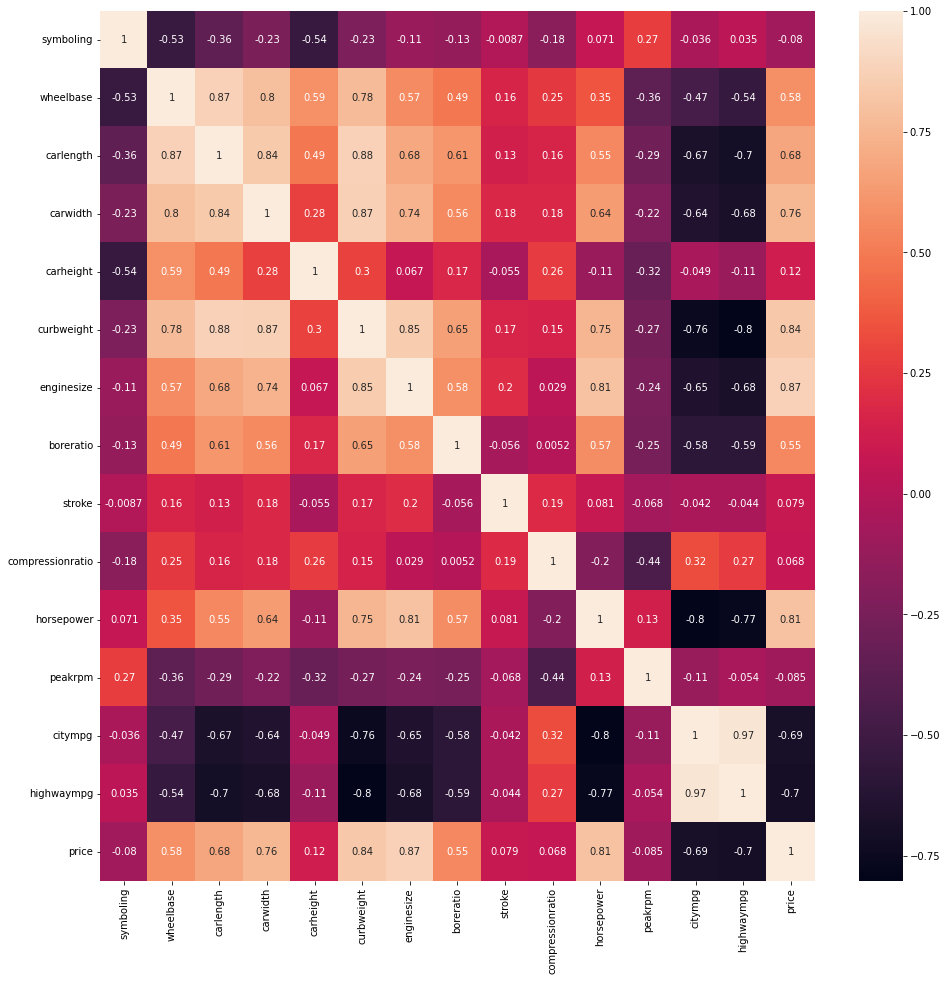

In [20]:
# S3.4: Draw a correlation heatmap between the numeric features.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(car_numeric_df.corr(),annot=True)
plt.show()

The heatmap shows some useful insights:

**Correlation of `price` with independent variables**

- `price` is highly and positively correlated with `wheelbase, carlength, carwidth, curbweight, enginesize` and `horsepower` 

- `price` is negatively correlated to `citympg` and `highwaympg` (`-0.70` approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower. These cars are designed to be affordable by the budget buyers who value more fuel efficiency mileage over powerful engine

**Correlation among independent variables**

- Many independent variables are highly correlated (top-left part of the heatmap) such as `wheelbase, carlength, curbweight, enginesize` etc. They are all measures of size and weight and are positively correlated

So you need to be wary of multicollinearity in the linear regression model that you build.

Now let's look at the first five rows of the `doornumber` and `cylindernumber` columns.

In [21]:
# S3.5: Get the first five rows of the 'doornumber' and 'cylindernumber' columns.
cars_df[['doornumber','cylindernumber']].head()

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


Notice that the `doornumber` and `cylindernumber` columns are supposed to have numeric type values. But the numbers are reported in the words. So, you need to replace these words with the corresponding numbers. For this you can use the `map()` function. But first let's get the counts of all the values in the above two columns so that we can verify with these counts whether the the conversion to numeric values was successful or not.



In [23]:
# S3.6: Count the occurrence of each value in the 'cylindernumber' column.
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

So, you need to represent the above numbers (written in words) into their numeric forms. 

In [24]:
# S3.7: Count the occurrence of each value in the 'doornumber' column.
cars_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

Here, you need to represent `two` and `four` to their numeric forms.Now, let's learn the `map()` function.

--- 

#### Task 4: The `map()` Function

A map function is similar to a match the column exercise. You have a match one set of values with the other set of values.

Here you need to map:

- `one` to `1`

- `three` to `3`

- `four` to `4` 

- `five` to `5` 

- `six` to `6`

- `eight` to `8`

- `twelve` to `12`

To do the above replacement, 

1. First, you need to create a dictionary in which the words are keys and their corresponding numeric representations are the values.

2. Apply the `map()` function. It takes the dictionary created in step one as an input.

Let's understand this concept with the help of an example. Let's first create a Pandas series containing the above 7 numbers in the word form. Then let's create a dictionary as discussed in the first point. And then apply the `map()` function.



In [25]:
# S4.1: Use the 'map()' function to replace a words in a Pandas series to their corresponding numeric values.
words=pd.Series(['two','three','four','five','six','eight','twelve'])
word_dict={'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
words=words.map(word_dict)
words

0     2
1     3
2     4
3     5
4     6
5     8
6    12
dtype: int64

**How does the `map()` function works?**

It iterates through each element in a series (or array), and then look for that item as a key in the dictionary (the input to the `map()` function). If the key is found, then it replaces the key with its corresponding value in the dictionary.


In [27]:
# S4.2: Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
def num_map(series):
    return series.map(word_dict)
cars_df[['doornumber','cylindernumber']]=cars_df[['doornumber','cylindernumber']].apply(num_map,axis=1)

Now let's display the first five rows of the `'cylindernumber'` and `'doornumber'` columns to verify whether the replacement was successful or not. Let's also check whether the data-types are integer or not.

In [29]:
# S4.3: Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
cars_df[['doornumber','cylindernumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   doornumber      205 non-null    int64
 1   cylindernumber  205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


Let's stop here now. We are very close to building the linear regression model to predict the car prices that we shall continue from the next class.

---